<a href="https://colab.research.google.com/github/Nfsu26/utkarshraj/blob/main/dvt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the image
img_path = '/content/img1.jpg'  # Replace with your image path
img = Image.open(img_path)

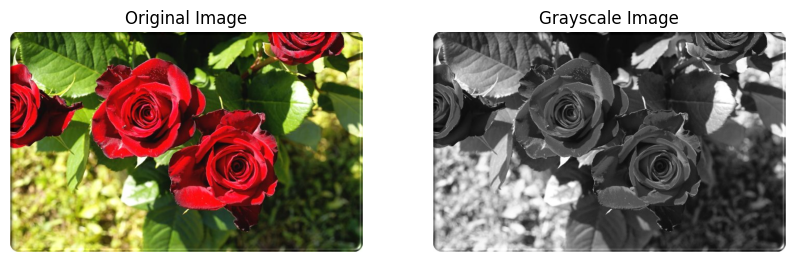

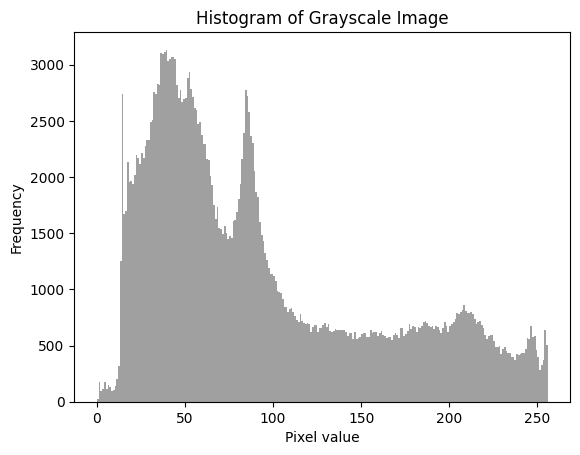

In [ ]:
# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # Hide axes ticks

# Convert the image to grayscale
#.convert(): This is a method provided by the PIL library to convert an image from one mode to another. The mode can be various color spaces or formats like 'RGB', 'L', 'RGBA', etc.
#'L': This is the mode to which you want to convert the image. Specifically, 'L' stands for "luminance," which represents the image in grayscale.
img_gray = img.convert('L')


# Display the grayscale image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Show the plots
plt.show()

# Display histogram of the grayscale image
plt.figure()
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

# Convert the grayscale image to a numpy array for histogram
img_gray_np = np.array(img_gray)
plt.hist(img_gray_np.flatten(), bins=256, range=[0,256], color='gray', alpha=0.75)

# Show the histogram
plt.show()

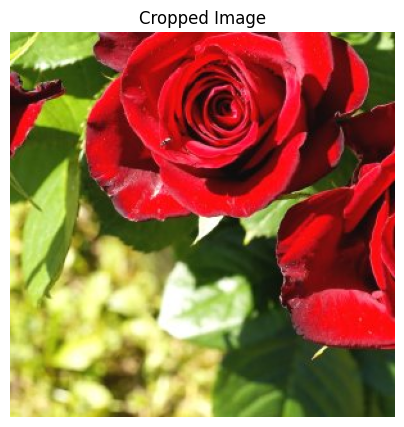

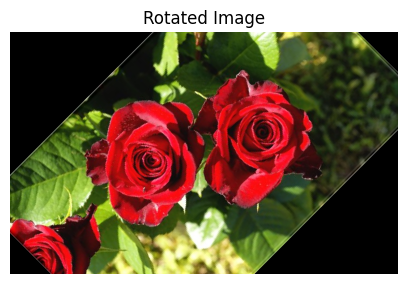

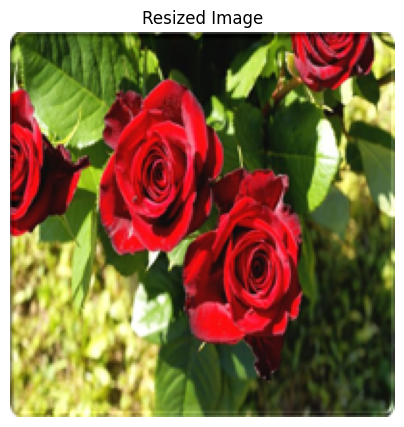

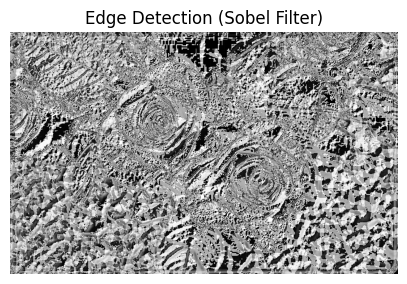

In [ ]:
from scipy.ndimage import sobel

# Crop the image
# Define the crop area as (left, top, right, bottom)
crop_area = (100, 100, 400, 400)  # Adjust these values based on your image
img_cropped = img.crop(crop_area)

# Display the cropped image
plt.figure(figsize=(5, 5))
plt.imshow(img_cropped)
plt.title('Cropped Image')
plt.axis('off')
plt.show()

# Rotate the image
img_rotated = img.rotate(45)  # Rotate by 45 degrees

# Display the rotated image
plt.figure(figsize=(5, 5))
plt.imshow(img_rotated)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

# Scaling (resizing) the image
#resizes the image to a new width and height (200x200 pixels in this example).
new_size = (200, 200)  # New size: 200x200 pixels
img_resized = img.resize(new_size)

# Display the resized image
plt.figure(figsize=(5, 5))
plt.imshow(img_resized)
plt.title('Resized Image')
plt.axis('off')
plt.show()

# Edge detection using Sobel filter
# Convert the image to a numpy array and apply the Sobel filter
#Sobel filter is applied separately to the x-axis (axis=0) and y-axis (axis=1) of the image
#sobel() computes the gradient of the image intensity. The returned images (dx and dy) represent the directional changes in the horizontal and vertical directions, respectively.
#High gradients indicate a steep change, which usually corresponds to edges.
#Gradients capture important properties of the image, such as orientation and intensity change, which are useful for distinguishing different objects or textures in an image.
#np.hypot(dx, dy) calculates the magnitude of the gradient at each point, effectively highlighting edges in the image. This result is stored in img_sobel.
img_gray_np = np.array(img_gray)  # Use the grayscale image from before
dx = sobel(img_gray_np, axis=0, mode='constant')  # Sobel filter on x-axis

dy = sobel(img_gray_np, axis=1, mode='constant')  # Sobel filter on y-axis
img_sobel = np.hypot(dx, dy)  # Compute the magnitude

# Display the edge-detected image
plt.figure(figsize=(5, 5))
plt.imshow(img_sobel, cmap='gray')
plt.title('Edge Detection (Sobel Filter)')
plt.axis('off')
plt.show()

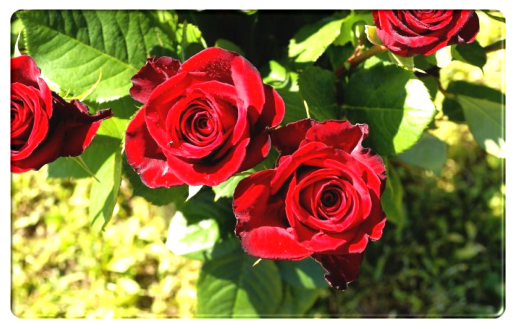

In [ ]:
img_np = np.array(img)

# contrast enhancement
#Ensure the result stays in the 0-255 range
# simple contrast enhancement by multiplying all pixel values by a factor (1.2 in this case, but it can be adjusted  to achieve the desired level of contrast),
img_contrast = np.clip(img_np * 1.2, 0, 255).astype(np.uint8)

# Display the enhanced image
plt.imshow(img_contrast)
plt.axis('off')  # Remove axis for better visualization
plt.show()


<ipython-input-6-9b9d584d5e47>:8: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_img = restoration.denoise_wavelet(img_float, multichannel=True)


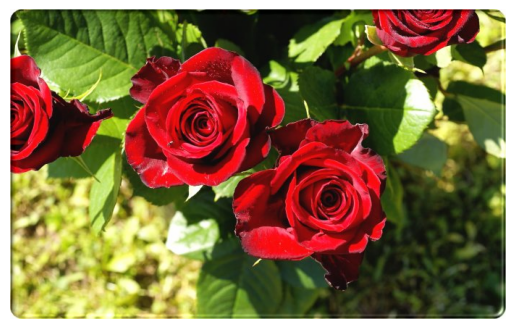

In [ ]:
from skimage import io, restoration

# Apply wavelet denoising
# converting to float is recommended as denoise_wavelet may expect float inputs
img_float = img_np.astype('float') / 255
#applying wavelet-based denoising to a floating-point representation of an image using the denoise_wavelet function from the restoration module of the skimage (Scikit-Image) library.
#multichannel=True: This parameter indicates that the input image has multiple channels (for example, an RGB color image), and the denoising process should be applied independently to each channel
denoised_img = restoration.denoise_wavelet(img_float, multichannel=True)

# Convert back to uint8 and display the denoised image
denoised_img_uint8 = (denoised_img * 255).astype('uint8')
plt.imshow(denoised_img_uint8)
plt.axis('off')
plt.show()


The image is not loaded as a numpy array.
[[0.99607843 1.         0.98431373]
 [0.97647059 0.98431373 0.97254902]
 [1.         1.         1.        ]
 ...
 [0.99607843 1.         1.        ]
 [0.99607843 1.         1.        ]
 [1.         1.         1.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


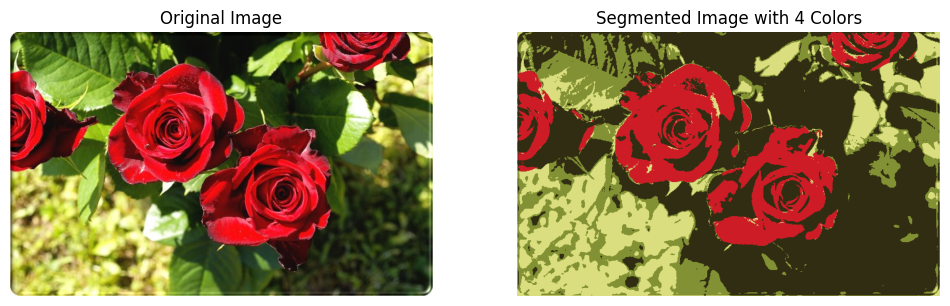

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans

# Verify img is a numpy array
if not isinstance(img, np.ndarray):
    print("The image is not loaded as a numpy array.")
    exit()

# Normalize the image data
img_normalized = img_np / 255.0

# Reshape the image to a 2D array of pixels
rows, cols, channels = img_normalized.shape
img_reshaped = img_normalized.reshape(rows * cols, channels)
print(img_reshaped)

# Apply k-means clustering
num_clusters = 4  # Adjust this to change the number of segments
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(img_reshaped)
cluster_labels = kmeans.labels_

# Create the segmented image from the cluster centers and labels
#The cluster centers (average colors of each cluster) are mapped back to the original pixels according to their labels, creating a new image array where each pixel's color is replaced with the color of its cluster center.
#This new image array is reshaped back to the original image dimensions to form the segmented image.
segmented_img = kmeans.cluster_centers_[cluster_labels].reshape(rows, cols, channels)

# Display the original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_normalized)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_img)
axes[1].set_title(f'Segmented Image with {num_clusters} Colors')
axes[1].axis('off')

plt.show()